In [ ]:
#correlation window visualization

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import plotly as py
import plotly.express as px
import openpyxl
from openpyxl import Workbook
import os
from matplotlib.pyplot import figure
os.getcwd()

'/Users/robertozuniga/Desktop/kickstartstrategies'

In [26]:
SPX = pd.read_csv('DATA-240/SPX.csv')
DAX = pd.read_csv('DATA-240/DAX.csv')
HCSI = pd.read_csv('DATA-240/HCSI.csv')
BTC = pd.read_csv('DATA-240/BTC.csv')
US02Y = pd.read_csv('DATA-240/US02Y.csv')
US10Y = pd.read_csv('DATA-240/US10Y.csv')
USOIL= pd.read_csv('DATA-240/USOIL.csv')
XAU = pd.read_csv('DATA-240/XAU.csv')


In [17]:
#SPX= SPX[['close']]
#DAX =DAX[['close']]

In [38]:
SPX

time     open     high      low    close  \
0     2018-09-11T09:30:00-04:00  2871.57  2892.52  2866.78  2889.09   
1     2018-09-11T13:30:00-04:00  2888.90  2891.67  2886.89  2887.89   
2     2018-09-12T09:30:00-04:00  2888.29  2894.65  2879.20  2888.62   
3     2018-09-12T13:30:00-04:00  2888.63  2892.06  2882.63  2888.92   
4     2018-09-13T09:30:00-04:00  2896.85  2906.76  2896.39  2902.51   
...                         ...      ...      ...      ...      ...   
1905  2022-06-27T09:30:00-04:00  3923.74  3927.72  3890.53  3907.24   
1906  2022-06-27T13:30:00-04:00  3907.25  3907.85  3889.66  3900.12   
1907  2022-06-28T09:30:00-04:00  3915.54  3945.86  3840.26  3849.98   
1908  2022-06-28T13:30:00-04:00  3850.03  3851.32  3820.14  3821.54   
1909  2022-06-29T09:30:00-04:00  3825.09  3836.50  3799.02  3804.90   

            RSI  RSI-based MA  Upper Bollinger Band  Lower Bollinger Band  
0     55.362641     54.098789                   NaN                   NaN  
1     54.604858     53.340149                   NaN                   NaN  
2     55.008305     52.864673                   NaN                   NaN  
3     55.184579     52.238786                   NaN                   NaN  
4     62.375848     52.578218                   NaN                   NaN  
...         ...           ...                   ...                   ...  
1905  55.843486     39.069338                   NaN                   NaN  
1906  54.965270     40.724466                   NaN                   NaN  
1907  49.108305     42.394626                   NaN                   NaN  
1908  46.107189     43.907463                   NaN                   NaN  
1909  44.397585     45.095399                   NaN                   NaN  

[1910 rows x 9 columns]

<AxesSubplot:xlabel='time'>

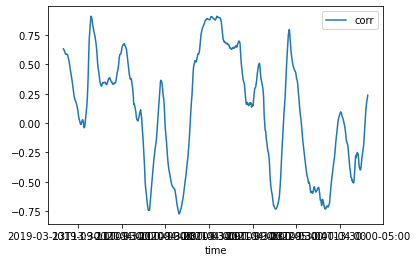

In [30]:
corr_df = pd.DataFrame()
corr_df['corr'] = SPX['close'].rolling(168).corr(DAX['close'])
corr_df['time'] = SPX['time']
corr_df = corr_df.set_index('time')
corr_df.plot()
#corr_df['time'] = SPX['time']

In [3]:
#Extract only close values on each df to calculate correlations 

SPX= SPX[['close']]
DAX =DAX[['close']]
HCSI= HCSI[['close']]
BTC = BTC [['close']]
US02Y = US02Y[['close']]
US10Y = US10Y[['close']]
USOIL = USOIL[['close']]
XAU = XAU[['close']]

In [40]:
#plot a week rolling window 

Week_window_SPX_DAX = SPX.rolling(168).corr(DAX)
Week_window_SPX_HCSI = SPX.rolling(168).corr(HCSI)
Week_window_SPX_BTC = SPX.rolling(168).corr(BTC)
Week_window_SPX_US02Y = SPX.rolling(168).corr(US02Y)
Week_window_SPX_US10Y = SPX.rolling(168).corr(US10Y)
Week_window_SPX_USOIL = SPX.rolling(168).corr(USOIL)
Week_window_SPX_XAU = SPX.rolling(168).corr(XAU)

TypeError: cannot handle this type -> object

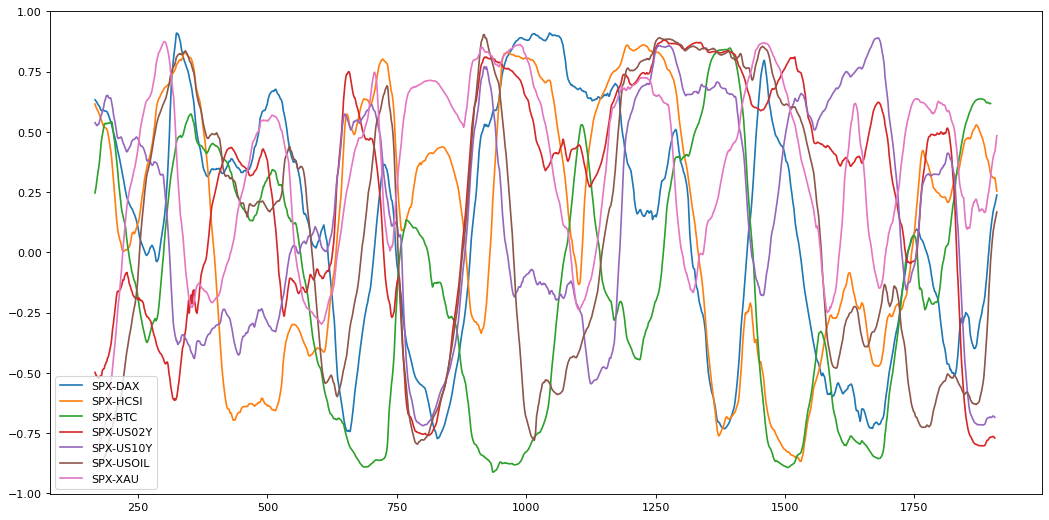

In [5]:
figure(figsize=(16, 8), dpi=80)
plt.plot(Week_window_SPX_DAX, label= 'SPX-DAX')
plt.plot(Week_window_SPX_HCSI, label= 'SPX-HCSI')
plt.plot(Week_window_SPX_BTC, label= 'SPX-BTC')
plt.plot(Week_window_SPX_US02Y, label= 'SPX-US02Y')
plt.plot(Week_window_SPX_US10Y, label= 'SPX-US10Y')
plt.plot(Week_window_SPX_USOIL, label= 'SPX-USOIL')
plt.plot(Week_window_SPX_XAU, label= 'SPX-XAU')
plt.legend(loc='best')
plt.show()

In [39]:
Week_window_SPX_DAX

NameError: name 'Week_window_SPX_DAX' is not defined

In [9]:
week_windows = [
    (Week_window_SPX_DAX, 'dax'),
    (Week_window_SPX_HCSI, 'hcsi'),
    Week_window_SPX_BTC,
    Week_window_SPX_US02Y,
    Week_window_SPX_US10Y,
    Week_window_SPX_USOIL,
    Week_window_SPX_XAU
]




for week_window in week_windows:
    dataframe, ticker = week_window
    fig = px.line(dataframe, y="close", title=f"Correlation Coeficient Week Window SPX - {ticker}")
    fig.show()

In [ ]:
#Compute percetgae change plot from weekly correlation window


for week_window in week_windows:
    week_correlation_change = week_window.pct_change()
    fig = px.line(week_correlation_change)
    fig.show()

In [ ]:
#plot a 2 day rolling window 

D2_window_SPX_DAX = SPX.rolling(48).corr(DAX)
D2_window_SPX_HCSI = SPX.rolling(48).corr(HCSI)
D2_window_SPX_BTC = SPX.rolling(48).corr(BTC)
D2_window_SPX_US02Y = SPX.rolling(48).corr(US02Y)
D2_window_SPX_US10Y = SPX.rolling(48).corr(US10Y)
D2_window_SPX_USOIL = SPX.rolling(48).corr(USOIL)
D2_window_SPX_XAU = SPX.rolling(48).corr(XAU)

In [ ]:
D2_windows=[D2_window_SPX_DAX,D2_window_SPX_HCSI, D2_window_SPX_BTC,D2_window_SPX_US02Y,
             D2_window_SPX_US10Y,D2_window_SPX_USOIL,D2_window_SPX_XAU]

for D2_window in D2_windows:
    fig = px.line(D2_window, y="close", title=f"Correlation Coeficient Week Window SPX")
    fig.show()

In [7]:
#plot a 30 day rolling window 

D30_window_SPX_DAX = SPX.rolling(720).corr(DAX)
D30_window_SPX_HCSI = SPX.rolling(720).corr(HCSI)
D30_window_SPX_BTC = SPX.rolling(720).corr(BTC)
D30_window_SPX_US02Y = SPX.rolling(720).corr(US02Y)
D30_window_SPX_US10Y = SPX.rolling(720).corr(US10Y)
D30_window_SPX_USOIL = SPX.rolling(720).corr(USOIL)
D30_window_SPX_XAU = SPX.rolling(720).corr(XAU)

In [ ]:
D30_windows=[D30_window_SPX_DAX,D30_window_SPX_HCSI, D30_window_SPX_BTC,D30_window_SPX_US02Y,
             D30_window_SPX_US10Y,D30_window_SPX_USOIL,D30_window_SPX_XAU]

for D30_window in D30_windows:
    fig = px.line(D30_window, y="close", title=f"Correlation Coeficient Week Window SPX")
    fig.show()

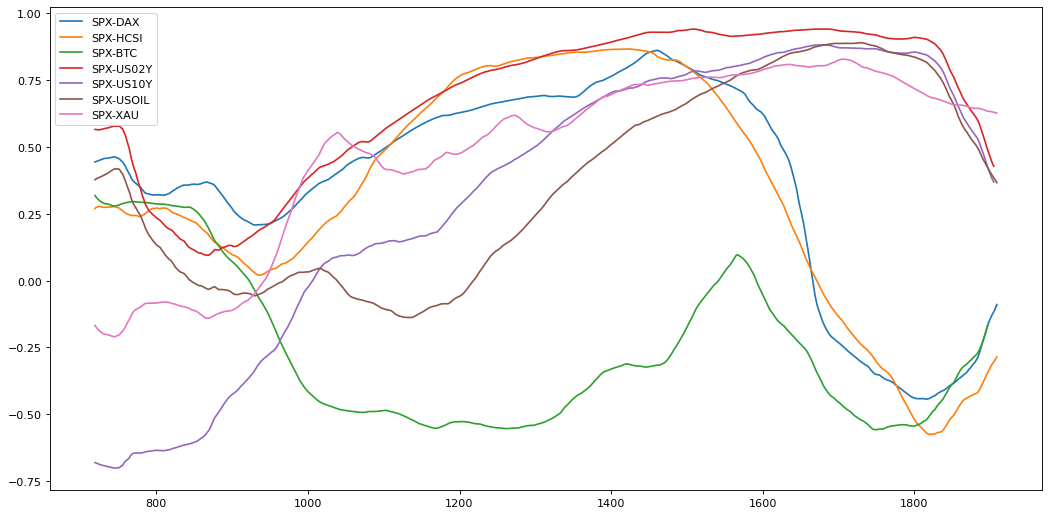

In [8]:
figure(figsize=(16, 8), dpi=80)
plt.plot(D30_window_SPX_DAX, label= 'SPX-DAX')
plt.plot(D30_window_SPX_HCSI, label= 'SPX-HCSI')
plt.plot(D30_window_SPX_BTC, label= 'SPX-BTC')
plt.plot(D30_window_SPX_US02Y, label= 'SPX-US02Y')
plt.plot(D30_window_SPX_US10Y, label= 'SPX-US10Y')
plt.plot(D30_window_SPX_USOIL, label = 'SPX-USOIL')
plt.plot(D30_window_SPX_XAU, label ='SPX-XAU')
plt.legend(loc='best')
plt.show()

In [48]:
SPX['time'] = pd.to_datetime(SPX['time'], utc=True)

#double check data why 9:30 -> 13:30 -> 9:30

#TODO type object, convert it to pandas datetime
#fix data alignment 




In [49]:
SPX['time']

0      2018-09-11 13:30:00+00:00
1      2018-09-11 17:30:00+00:00
2      2018-09-12 13:30:00+00:00
3      2018-09-12 17:30:00+00:00
4      2018-09-13 13:30:00+00:00
                  ...           
1905   2022-06-27 13:30:00+00:00
1906   2022-06-27 17:30:00+00:00
1907   2022-06-28 13:30:00+00:00
1908   2022-06-28 17:30:00+00:00
1909   2022-06-29 13:30:00+00:00
Name: time, Length: 1910, dtype: datetime64[ns, UTC]

In [50]:
DAX['time'] = pd.to_datetime(DAX['time'], utc=True)

In [55]:
DAX['time']

0      2019-12-23 12:00:00+00:00
1      2019-12-23 16:00:00+00:00
2      2019-12-27 08:00:00+00:00
3      2019-12-27 12:00:00+00:00
4      2019-12-27 16:00:00+00:00
                  ...           
1905   2022-06-28 11:00:00+00:00
1906   2022-06-28 15:00:00+00:00
1907   2022-06-29 07:00:00+00:00
1908   2022-06-29 11:00:00+00:00
1909   2022-06-29 15:00:00+00:00
Name: time, Length: 1910, dtype: datetime64[ns, UTC]

In [54]:
DAX[DAX['time'].isin(SPX['time'])]

Empty DataFrame
Columns: [time, open, high, low, close, RSI, RSI-based MA, Upper Bollinger Band, Lower Bollinger Band]
Index: []

In [57]:
D2_window_SPX_DAX = SPX.rolling(48).corr(DAX)
D2_window_SPX_DAX

TypeError: cannot perform __rmul__ with this index type: DatetimeArray